In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdFMCS
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # resolution for figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [2]:
molecule_names = ['Tiglic_acid',
                  'Caprolactone',
                  'gamma_butyrolactone',
                  'Acrylic_acid',
                  'muconic_acid',
                  'Limonene',
                  'Levulinic_acid',
                  'Adipic_acid',
                  'Butanone',
                  'Heptane',
                  '14_Butanediol',
                  'Maleic_acid',
                  'Aminobutyric_acid',
                  'Nonadecene',
                  'Sphingosine']

In [3]:
pks_plus_bio_dict = {}

for molecule_name in molecule_names:
    
    filepath = f'../data/15_curated_molecules_figs_5_&_6/{molecule_name}_PKS_BIO1.txt'
    
    PKS_product_similarities = []
    BIO_product_similarities = []
    
    try:
        with open(filepath, 'r') as file:
            print(filepath)
            
            for line in file:

                if 'PKS product similarity' in line:
                    PKS_product_similarity = float(line.strip('PKS product similarity :'))
                    PKS_product_similarities.append(PKS_product_similarity)

                if 'Bio product similarity' in line:
                    BIO_product_similarity = float(line.strip('Bio product similarity:'))
                    BIO_product_similarities.append(BIO_product_similarity)
    
    except FileNotFoundError:
        filepath = f'../data/15_curated_molecules_figs_5_&_6/{molecule_name}_PKS_only.txt'
        PKS_product_similarities.append(1)
        print(filepath)
        
    list_of_similarity_tuples = []
    
    for i in range(0,len(PKS_product_similarities)):
        try:
            similarity_tuple = (PKS_product_similarities[i], BIO_product_similarities[i])
            list_of_similarity_tuples.append(similarity_tuple)
        except IndexError:
            similarity_tuple = (PKS_product_similarities[i])
            list_of_similarity_tuples.append(similarity_tuple)
            
    
    pks_plus_bio_dict[molecule_name] = list_of_similarity_tuples

../data/15_curated_molecules_figs_5_&_6/Tiglic_acid_PKS_only.txt
../data/15_curated_molecules_figs_5_&_6/Caprolactone_PKS_only.txt
../data/15_curated_molecules_figs_5_&_6/gamma_butyrolactone_PKS_only.txt
../data/15_curated_molecules_figs_5_&_6/Acrylic_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/muconic_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Limonene_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Levulinic_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Adipic_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Butanone_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Heptane_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/14_Butanediol_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Maleic_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Aminobutyric_acid_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Nonadecene_PKS_BIO1.txt
../data/15_curated_molecules_figs_5_&_6/Sphingosine_PKS_BIO1.txt


In [4]:
pks_plus_bio_dict

{'Tiglic_acid': [1],
 'Caprolactone': [1],
 'gamma_butyrolactone': [1],
 'Acrylic_acid': [(0.7142857142857143, 1.0)],
 'muconic_acid': [(0.9, 1.0)],
 'Limonene': [(0.6923076923076923, 0.7692307692307693),
  (0.6666666666666666, 0.75),
  (0.5833333333333334, 0.6666666666666666),
  (0.5833333333333334, 0.6923076923076923),
  (0.5833333333333334, 0.6923076923076923),
  (0.5714285714285714, 0.75)],
 'Levulinic_acid': [(0.6363636363636364, 1.0)],
 'Adipic_acid': [(0.9, 1.0)],
 'Butanone': [(0.7142857142857143, 0.8333333333333334),
  (0.625, 0.7142857142857143),
  (0.625, 0.7142857142857143),
  (0.625, 1.0)],
 'Heptane': [(0.7777777777777778, 0.875),
  (0.7, 0.7777777777777778),
  (0.7, 0.7777777777777778),
  (0.7, 1.0)],
 '14_Butanediol': [(0.8571428571428571, 1.0)],
 'Maleic_acid': [(0.875, 1.0)],
 'Aminobutyric_acid': [(0.75, 0.8571428571428571),
  (0.6666666666666666, 0.8571428571428571),
  (0.6666666666666666, 0.75),
  (0.6666666666666666, 0.75),
  (0.6666666666666666, 0.75),
  (0.66666

In [5]:
plt.figure(figsize=(35, 10)) # (25,8)
plt.ylim([0,1.1])
plt.ylabel('Chemical similarity score',fontsize=35)
plt.title('Biosynthesis of molecules by PKSs and post-PKS tailorings',fontsize=35,y=1.02)
norm = plt.Normalize(1,6)
x_labels = []
x_label_positions = []
jitter_amount = 0.02

spacing_increment = 30  # Increase this value to spread out molecules more
pks_indexes = np.arange(0, 
                        len(molecule_names) * spacing_increment, 
                        spacing_increment)  

better_names = ['Tiglic acid',
                'Caprolactone',
                '\u03B3-butyrolactone',
                'Acrylic\nacid',
                'Muconic\nacid',
                'Limonene',
                'Levulinic\nacid  ',
                'Adipic\nacid  ',
                'Butanone',
                'Heptane',
                '1,4-Butanediol',
                'Maleic\nacid',
                'Amino-\nbutyric acid',
                'Nonadecene',
                'Sphingosine']

for i,molecule in enumerate(molecule_names):
    
    pks_index = pks_indexes[i] 
    non_pks_index = pks_indexes[i] + 10 
    line_divider_index = pks_indexes[i] + 20
    x_labels.append(better_names[i])
    x_label_positions.append(pks_index)
    
    if i < ( len(molecule_names) - 1 ):
        plt.axvline(x = line_divider_index, color = 'k')
    
    list_of_similarity_tuples = pks_plus_bio_dict[molecule]
    print(list_of_similarity_tuples)
    
    hybrid_design_num = 0
    
    for similarity_tuple in list_of_similarity_tuples:
        hybrid_design_num += 1
        
        try:
            pks_product_similarity = similarity_tuple[0]
        except TypeError:
            pks_product_similarity = 1.0
            
        if pks_product_similarity < 1:
        
            # add in some jitter
            jitter = np.random.uniform(-jitter_amount, jitter_amount)    
            pks_product_similarity = pks_product_similarity + jitter
            
        plt.scatter(pks_index,
                    pks_product_similarity,
                    marker = '.',
                    edgecolor='k',
                    s = 1200,
                    c = hybrid_design_num,
                    cmap = 'viridis',
                    norm = norm,
                    alpha = 0.7)
            
        try:
            non_pks_product_similarity = similarity_tuple[1]
            
            if non_pks_product_similarity < 1:
            
                # add in some jitter
                jitter = np.random.uniform(-jitter_amount, jitter_amount)
                non_pks_product_similarity = non_pks_product_similarity + jitter
            
            plt.scatter(non_pks_index,
            non_pks_product_similarity,
            marker = '*',
            edgecolor = 'k',
            s = 1000,
            c = hybrid_design_num,
            cmap = 'viridis',
            norm = norm,
            alpha = 0.7)
            
            x_connecting_line = [pks_index, non_pks_index]
            y_connecting_line = [pks_product_similarity, non_pks_product_similarity]
        
            plt.plot(x_connecting_line,y_connecting_line,linestyle='dashed',linewidth=2,color='k')

    
        except TypeError:
            pass
    
plt.xticks(x_label_positions, x_labels, rotation = 30, fontsize=25)  # Set custom x-ticks
plt.yticks(fontsize=30)

# custom legend
legend_elements = [plt.Line2D([0],[0],marker = 'o', color = 'w', markerfacecolor = 'k', markersize = 17, label = 'PKS product'),
                   plt.Line2D([0],[0],marker = '*', color = 'w', markerfacecolor = 'k', markersize = 25, label = 'PKS-modified product')]

legend = plt.legend(handles=legend_elements, loc='lower left', fontsize=20)
legend.get_frame().set_edgecolor('k')  # set legend border color to black

plt.grid(False)
plt.savefig('../figures/fig6_15_molecules_pks_plus_bio_pathways.png')
plt.show()

[1]
[1]
[1]
[(0.7142857142857143, 1.0)]
[(0.9, 1.0)]
[(0.6923076923076923, 0.7692307692307693), (0.6666666666666666, 0.75), (0.5833333333333334, 0.6666666666666666), (0.5833333333333334, 0.6923076923076923), (0.5833333333333334, 0.6923076923076923), (0.5714285714285714, 0.75)]
[(0.6363636363636364, 1.0)]
[(0.9, 1.0)]
[(0.7142857142857143, 0.8333333333333334), (0.625, 0.7142857142857143), (0.625, 0.7142857142857143), (0.625, 1.0)]
[(0.7777777777777778, 0.875), (0.7, 0.7777777777777778), (0.7, 0.7777777777777778), (0.7, 1.0)]
[(0.8571428571428571, 1.0)]
[(0.875, 1.0)]
[(0.75, 0.8571428571428571), (0.6666666666666666, 0.8571428571428571), (0.6666666666666666, 0.75), (0.6666666666666666, 0.75), (0.6666666666666666, 0.75), (0.6666666666666666, 0.75)]
[(0.9047619047619048, 0.95), (0.8636363636363636, 0.9047619047619048), (0.8636363636363636, 0.9047619047619048), (0.8636363636363636, 1.0)]
[(0.8695652173913043, 0.9090909090909091), (0.8333333333333334, 0.8695652173913043), (0.8333333333333334

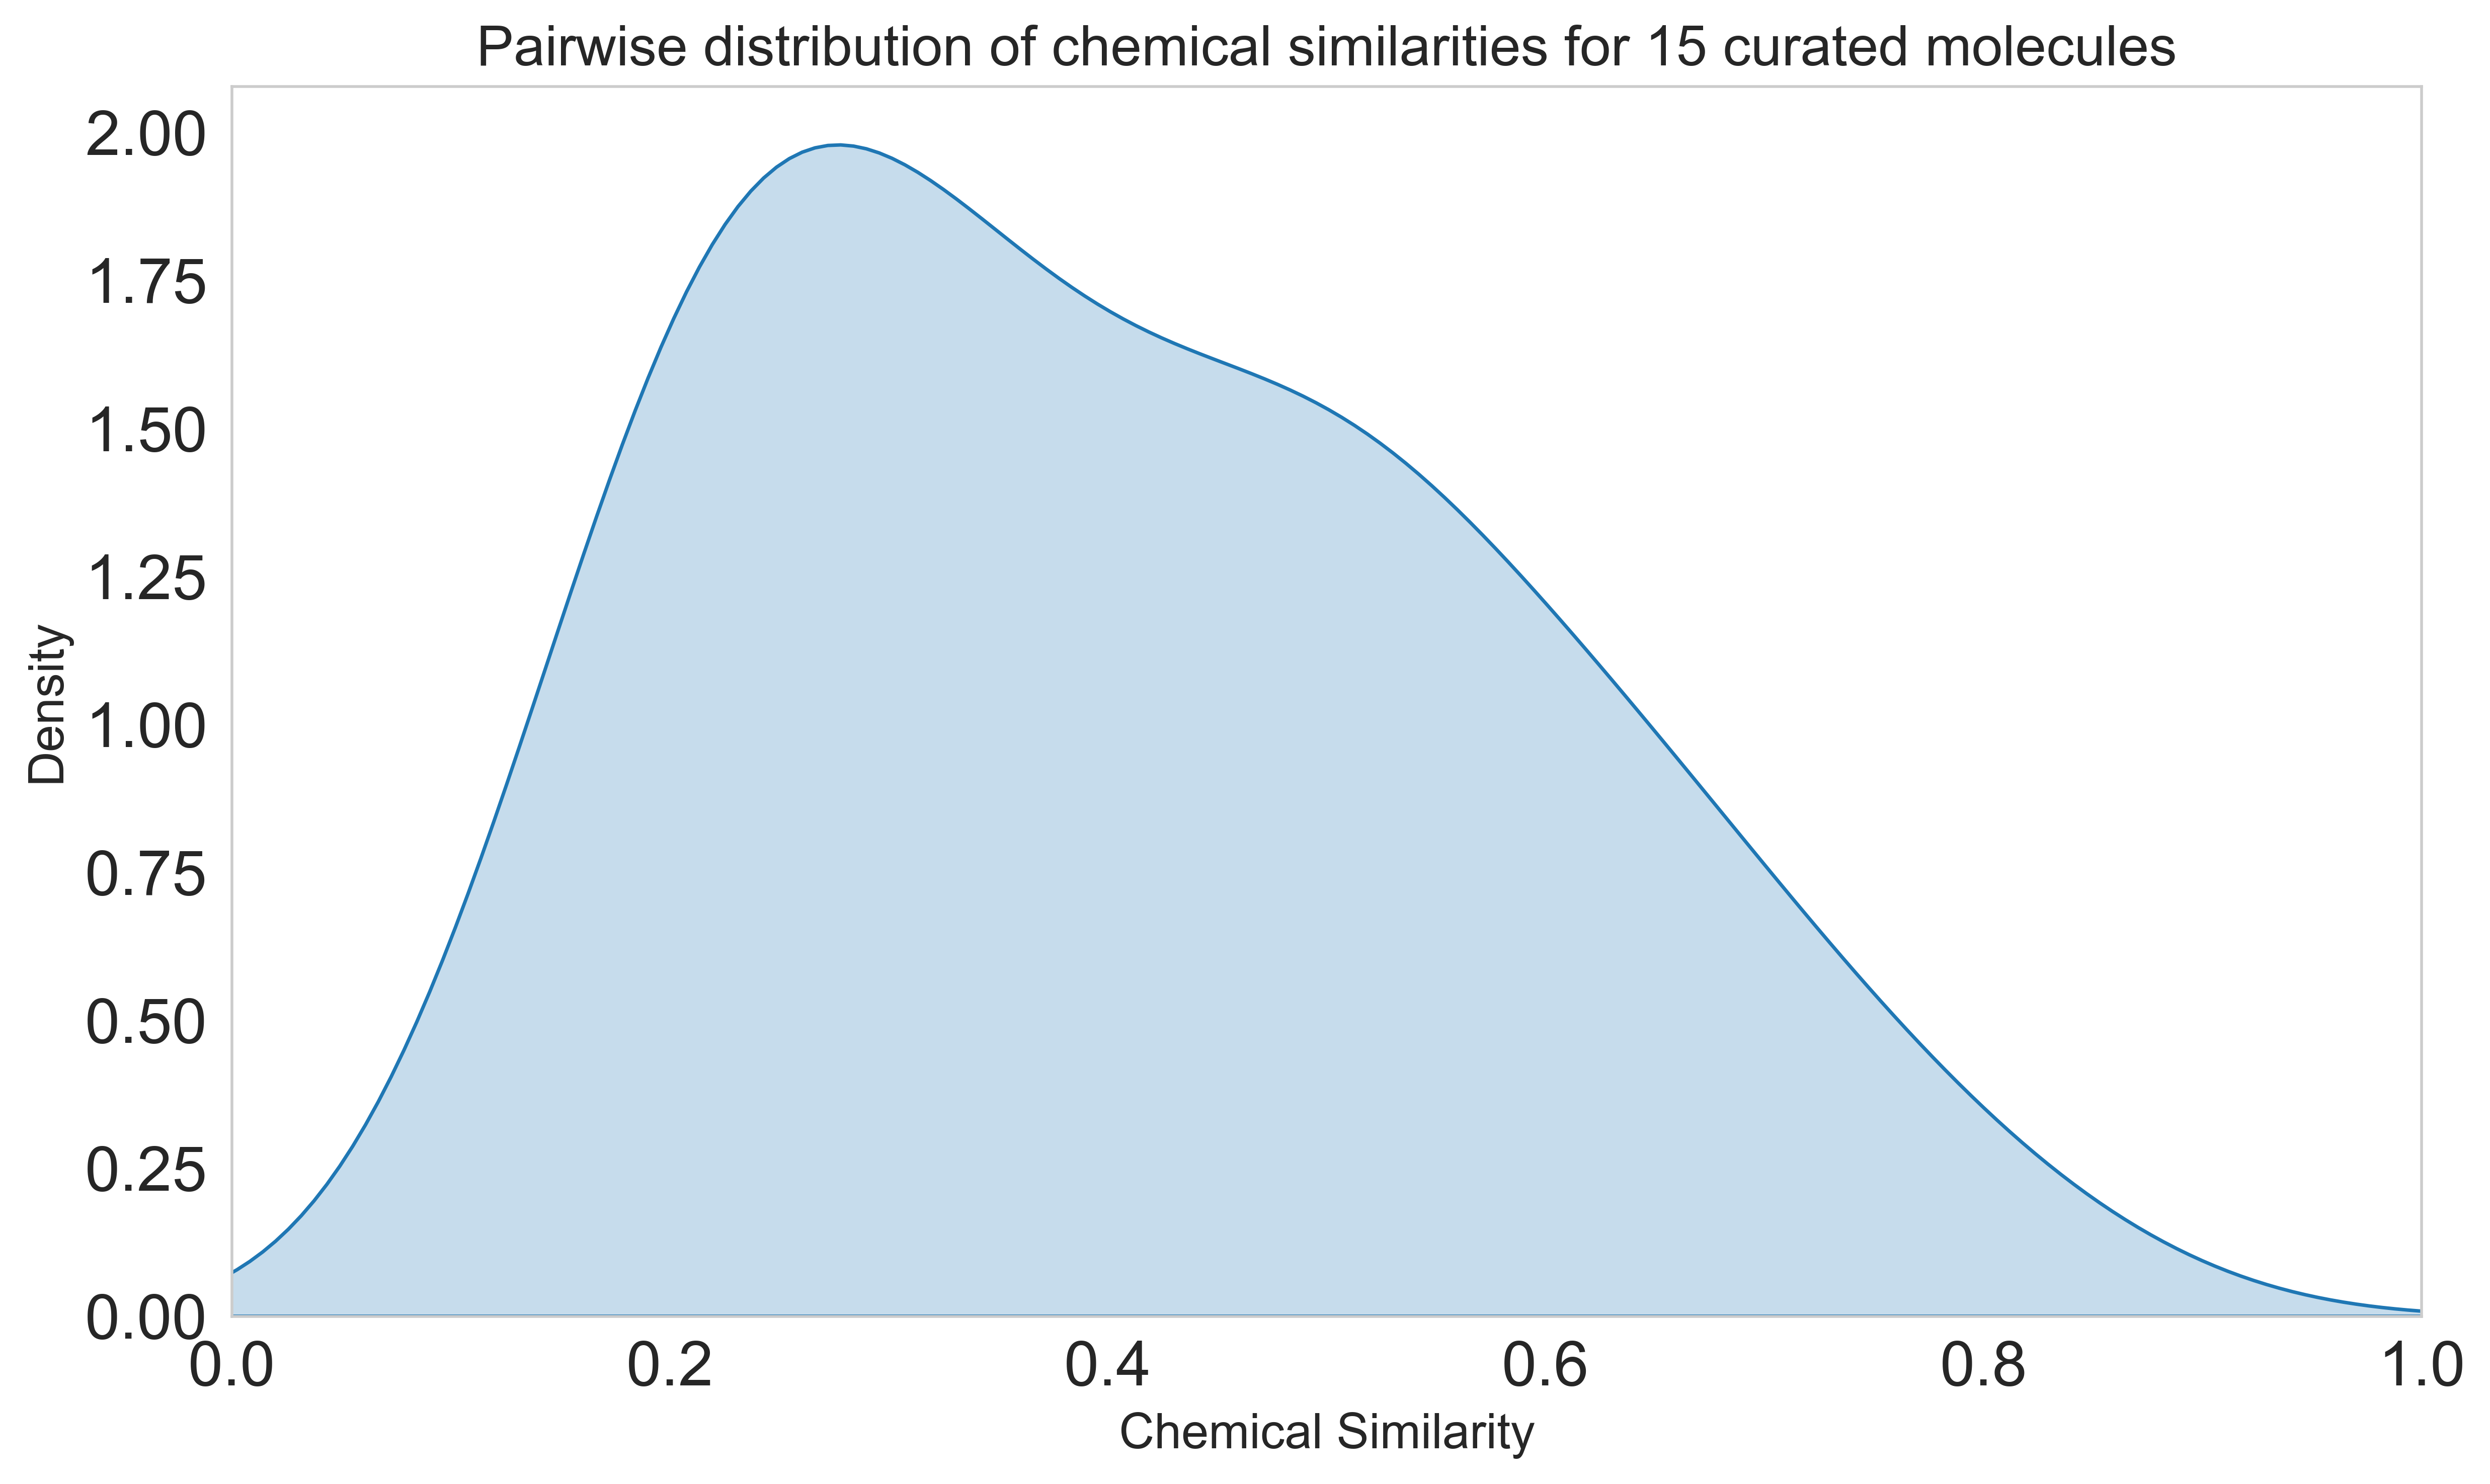

In [6]:
data = {'SMILES': ['CC=C(C)C(=O)O', 
                   'C1CCC(=O)OCC1', 
                   'C1CC(=O)OC1', 
                   'C=CC(=O)O', 
                   'C(=CC(=O)O)C=CC(=O)O',
                   'CC1=CCC(CC1)C(=C)C',
                   'CC(=O)CCC(=O)O',
                   'C(CCC(=O)O)CC(=O)O',
                   'CCC(=O)C',
                   'CCCCCCC',
                   'C(CCO)CO',
                   'C(=CC(=O)O)C(=O)O',
                   'C(CC(=O)O)CN',
                   'CCCCCCCCCCCCCCCCCC=C',
                   'CCCCCCCCCCCCCC=CC(C(CO)N)O']} 

df = pd.DataFrame(data)
    
def calculate_chemical_similarity(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    
    result = rdFMCS.FindMCS([mol1, mol2],
                                    timeout = 1,
                                    matchValences = True,
                                    matchChiralTag = False, # don't pay attention to stereo
                                    bondCompare = Chem.rdFMCS.BondCompare.CompareOrderExact)
    
    score = result.numAtoms / (len(mol1.GetAtoms()) + len(mol2.GetAtoms()) - result.numAtoms)
    
    return score

# Convert the RDKit fingerprints to a list
smiles_list = df['SMILES'].tolist()

# Calculate pairwise Tanimoto similarities
similarities = []
for i in range(len(smiles_list)):
    for j in range(i+1, len(smiles_list)):
        similarity = calculate_chemical_similarity(smiles_list[i], smiles_list[j])
        similarities.append(similarity)

# Create a DataFrame for the similarities
similarities_df = pd.DataFrame(similarities, columns=['Chemical Similarity'])

# Plot the KDE distribution
plt.figure(figsize=(10, 6))
plt.grid(False)
sns.kdeplot(similarities_df['Chemical Similarity'], shade=True)
plt.xlabel('Chemical Similarity', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Pairwise distribution of chemical similarities for 15 curated molecules', fontsize = 16)
plt.xlim([0,1])
plt.savefig('../figures/15_molecules_distribution.png')
plt.show()